In [1]:
%load_ext autoreload
%autoreload 2

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

In [2]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/te_counts",
)

In [3]:
omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

save_folder = f"logs/mds_disease/{'_'.join(omic_data_loaders.keys())}.csv"
save_folder

'logs/mds_disease/mrna_mirna_circrna.csv'

In [22]:
from src.evals.knn import KNNEvaluator

knn_eval = KNNEvaluator(
    data_manager=odm,
    n_trials=20,
    verbose=True,
    params={"k_lb": 1, "k_ub": 20},
)
_ = knn_eval.evaluate()
knn_eval.print_best_results()
# knn_eval.save_results(results_file=save_folder, row_name="KNN")

[I 2024-11-19 18:43:55,725] A new study created in memory with name: no-name-9141beaf-16de-49e1-a711-4d69ef328e6d
[I 2024-11-19 18:43:55,894] Trial 0 finished with value: 0.6752702676178449 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,036] Trial 1 finished with value: 0.6305302169311957 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.6752702676178449.


New best score: 0.675
Best model performance:
Accuracy: 0.905 ± 0.035
F1 Macro: 0.828 ± 0.068
F1 Weighted: 0.902 ± 0.039


[I 2024-11-19 18:43:56,207] Trial 2 finished with value: 0.6305302169311957 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,351] Trial 3 finished with value: 0.6752702676178449 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,514] Trial 4 finished with value: 0.669993140387569 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,657] Trial 5 finished with value: 0.5814461133586074 and parameters: {'n_neighbors': 17}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,801] Trial 6 finished with value: 0.6136105816633716 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:56,948] Trial 7 finished with value: 0.5814461133586074 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.6752702676178449.
[I 2024-11-19 18:43:57,126] Trial 8 f

Best model performance:
Accuracy: 0.905 ± 0.035
F1 Macro: 0.828 ± 0.068
F1 Weighted: 0.902 ± 0.039


In [249]:
# from src.evals.svm import SVMEvaluator

# svm_eval = SVMEvaluator(
#     data_manager=odm,
#     n_trials=50,
#     verbose=True,
#     params={
#         "C_lb": 0.01,
#         "C_ub": 10,
#         "no_rfe": True,
#         # "rfe_step_range": (0.05, 0.2),
#         # "rfe_n_features_range": (100, 200),
#     },
#     mode="linear",
# )
# _ = svm_eval.evaluate()
# svm_eval.save_results(results_file=save_folder, row_name="Linear SVM")

In [4]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=60,
    verbose=True,
)
_ = xgb_eval.evaluate()
# xgb_eval.print_best_results()
# xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-19 22:42:40,336] A new study created in memory with name: no-name-d82a4c1c-0211-47d0-9bf7-052f93f4dc40
[I 2024-11-19 22:42:40,611] Trial 0 finished with value: 0.6022120594382817 and parameters: {'lambda': 6.253646605840104e-06, 'alpha': 0.0003076233112417345}. Best is trial 0 with value: 0.6022120594382817.
[I 2024-11-19 22:42:40,809] Trial 1 finished with value: 0.6631836987350632 and parameters: {'lambda': 7.297663128254395e-08, 'alpha': 0.011450157411819355}. Best is trial 1 with value: 0.6631836987350632.


New best score: 0.602
Best model performance:
Accuracy: 0.879 ± 0.049
F1 Macro: 0.783 ± 0.062
F1 Weighted: 0.875 ± 0.048
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.8, 'f1_macro': np.float64(0.7204968944099379), 'f1_weighted': np.float64(0.8099378881987577)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.8148148148148148), 'f1_weighted': np.float64(0.9234567901234567)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]
New best score: 0.663
Best model performance:
Accuracy: 0.906 ± 0.032
F1 Macro: 0.815 ± 0.062
F1 Weighted: 0.898 ± 0.038
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(

[I 2024-11-19 22:42:41,039] Trial 2 finished with value: 0.27794757275052406 and parameters: {'lambda': 0.00045077396324042825, 'alpha': 0.5733870543486815}. Best is trial 1 with value: 0.6631836987350632.
[I 2024-11-19 22:42:41,263] Trial 3 finished with value: 0.6812403790638734 and parameters: {'lambda': 0.0002955971248753036, 'alpha': 5.212445129540903e-06}. Best is trial 3 with value: 0.6812403790638734.
[I 2024-11-19 22:42:41,453] Trial 4 finished with value: 0.6024938699160863 and parameters: {'lambda': 0.34804645208189317, 'alpha': 0.052508952047542724}. Best is trial 3 with value: 0.6812403790638734.


New best score: 0.681
Best model performance:
Accuracy: 0.906 ± 0.053
F1 Macro: 0.835 ± 0.098
F1 Weighted: 0.901 ± 0.059
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-11-19 22:42:41,676] Trial 5 finished with value: 0.6022120594382817 and parameters: {'lambda': 3.075936850846643e-07, 'alpha': 0.0004613207253027957}. Best is trial 3 with value: 0.6812403790638734.
[I 2024-11-19 22:42:41,881] Trial 6 finished with value: 0.3908956158579512 and parameters: {'lambda': 7.482163067778095e-05, 'alpha': 0.1370696813189315}. Best is trial 3 with value: 0.6812403790638734.
[I 2024-11-19 22:42:42,103] Trial 7 finished with value: 0.7021987425901142 and parameters: {'lambda': 6.385378127008458e-08, 'alpha': 9.407474085534675e-07}. Best is trial 7 with value: 0.7021987425901142.
[I 2024-11-19 22:42:42,293] Trial 8 finished with value: 0.27794757275052406 and parameters: {'lambda': 3.4283220294177978e-06, 'alpha': 0.18888873837426712}. Best is trial 7 with value: 0.7021987425901142.


New best score: 0.702
Best model performance:
Accuracy: 0.906 ± 0.068
F1 Macro: 0.854 ± 0.094
F1 Weighted: 0.908 ± 0.065
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8, 'f1_macro': np.float64(0.7204968944099379), 'f1_weighted': np.float64(0.8099378881987577)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-11-19 22:42:42,557] Trial 9 finished with value: 0.6022120594382817 and parameters: {'lambda': 0.00027884347288455045, 'alpha': 0.0007080214204929408}. Best is trial 7 with value: 0.7021987425901142.
[I 2024-11-19 22:42:42,825] Trial 10 finished with value: 0.7021987425901142 and parameters: {'lambda': 2.309646297999914e-08, 'alpha': 1.7738373879497367e-08}. Best is trial 7 with value: 0.7021987425901142.
[I 2024-11-19 22:42:43,069] Trial 11 finished with value: 0.7415719661868713 and parameters: {'lambda': 1.1534608807803516e-08, 'alpha': 2.246711743545117e-08}. Best is trial 11 with value: 0.7415719661868713.


New best score: 0.742
Best model performance:
Accuracy: 0.919 ± 0.050
F1 Macro: 0.876 ± 0.070
F1 Weighted: 0.921 ± 0.048
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.8295454545454546), 'f1_weighted': np.float64(0.8772727272727272)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-11-19 22:42:43,326] Trial 12 finished with value: 0.7021987425901142 and parameters: {'lambda': 6.992257376199923e-07, 'alpha': 3.351407202292434e-08}. Best is trial 11 with value: 0.7415719661868713.
[I 2024-11-19 22:42:43,555] Trial 13 finished with value: 0.6683944571819664 and parameters: {'lambda': 1.956009836205286e-08, 'alpha': 1.2810247617319172e-06}. Best is trial 11 with value: 0.7415719661868713.
[I 2024-11-19 22:42:43,742] Trial 14 finished with value: 0.7021987425901142 and parameters: {'lambda': 1.1009173077034239e-08, 'alpha': 5.311756586212017e-07}. Best is trial 11 with value: 0.7415719661868713.
[I 2024-11-19 22:42:43,958] Trial 15 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.015210201761068996, 'alpha': 1.489231283126605e-05}. Best is trial 15 with value: 0.7581635155117249.


New best score: 0.758
Best model performance:
Accuracy: 0.933 ± 0.060
F1 Macro: 0.877 ± 0.114
F1 Weighted: 0.927 ± 0.067
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-11-19 22:42:44,266] Trial 16 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.03798119858814191, 'alpha': 2.4820727217113303e-05}. Best is trial 15 with value: 0.7581635155117249.
[I 2024-11-19 22:42:44,517] Trial 17 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.08509858529145231, 'alpha': 2.4933592719659025e-05}. Best is trial 15 with value: 0.7581635155117249.
[I 2024-11-19 22:42:44,687] Trial 18 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.0066177684069596236, 'alpha': 2.5327574937619774e-05}. Best is trial 15 with value: 0.7581635155117249.
[I 2024-11-19 22:42:44,872] Trial 19 finished with value: 0.6631836987350632 and parameters: {'lambda': 0.009155150418273621, 'alpha': 0.002557698365024645}. Best is trial 15 with value: 0.7581635155117249.
[I 2024-11-19 22:42:45,072] Trial 20 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.011595130521547887, 'alpha': 5.1816205498109306e-05}. Best is

New best score: 0.775
Best model performance:
Accuracy: 0.932 ± 0.042
F1 Macro: 0.891 ± 0.067
F1 Weighted: 0.933 ± 0.042
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.9068322981366459), 'f1_weighted': np.float64(0.9366459627329193)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-11-19 22:42:47,374] Trial 30 finished with value: 0.7415719661868713 and parameters: {'lambda': 2.83869756396414e-05, 'alpha': 1.3777535431495196e-07}. Best is trial 29 with value: 0.775476069168414.
[I 2024-11-19 22:42:47,584] Trial 31 finished with value: 0.7415719661868713 and parameters: {'lambda': 1.2010055947773405e-05, 'alpha': 1.1244037233422158e-07}. Best is trial 29 with value: 0.775476069168414.
[I 2024-11-19 22:42:47,811] Trial 32 finished with value: 0.6631836987350632 and parameters: {'lambda': 0.0010956655245973567, 'alpha': 0.0002131110710308045}. Best is trial 29 with value: 0.775476069168414.
[I 2024-11-19 22:42:47,978] Trial 33 finished with value: 0.7039337563024542 and parameters: {'lambda': 0.23096910024756265, 'alpha': 3.444268858064219e-05}. Best is trial 29 with value: 0.775476069168414.
[I 2024-11-19 22:42:48,172] Trial 34 finished with value: 0.7581635155117249 and parameters: {'lambda': 0.016254065027757354, 'alpha': 8.297468099827499e-06}. Best is t

In [5]:
# params = {
#     "verbosity": 1,
#     "objective": "multi:softmax",
#     "eval_metric": "mlogloss",
#     # "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
#     # "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
#     "num_class": xgb_eval.n_classes,
# }

params = {'booster': 'gblinear', 'lambda': 0.00275843484832017, 'alpha': 9.065775976332792e-07}
# params.update(xgb_eval.best_params)
print("params", params)

feat_importances = xgb_eval.get_feature_importances(params)

params {'booster': 'gblinear', 'lambda': 0.00275843484832017, 'alpha': 9.065775976332792e-07}
{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}
{'ENSG00000181826': [0.4510290026664734, -0.4277534484863281], 'ENSG00000278588': [0.13377384841442108, -0.11903872340917587], 'ENSG00000120594': [0.07962843775749207, -0.028812192380428314], 'ENSG00000121797': [-0.19791872799396515, 0.1722356528043747], 'ENSG00000140398': [0.09946206212043762, -0.07905955612659454], 'ENSG00000168062': [-0.11108555644750595, 0.1200990229845047], 'ENSG00000174307': [-0.17104673385620117, 0.1695440113544464], 'ENSG00000184897': [0.06900585442781448, -0.06744503229856491], 'ENSG00000105497': [-0.15059907734394073, 0.14582733809947968], 'ENSG00000113552': [-0.1218375712633133, 0.10038475692272186], 'ENSG00000188536': [-0.029476284980773926, 0.034012410789728165], 'ENSG00000181004': [-0.078811876475811, 0.07503218203783035], 'ENSG00000143590': [-0.2119094282388687, 0.2059739

In [6]:
fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

In [7]:
fi_sorted

{'hsa_circ_0000489': 3.538129433989525,
 'ENSG00000181826': 3.3785678148269653,
 'ENSG00000221771': 3.097493499517441,
 'ENSG00000196230': 2.648639813065529,
 'ENSG00000084764': 2.0204912051558495,
 'ENSG00000198805': 1.9265561178326607,
 'ENSG00000184588': 1.8538805693387985,
 'ENSG00000121797': 1.8195056021213531,
 'ENSG00000128322': 1.7614513635635376,
 'ENSG00000158578': 1.6562849208712578,
 'ENSG00000068976': 1.6334860548377037,
 'ENSG00000026103': 1.6181691735982895,
 'ENSG00000168062': 1.5878431424498558,
 'ENSG00000185745': 1.5761975422501564,
 'hsa_circ_0032649': 1.5671551302075386,
 'ENSG00000140398': 1.5541058704257011,
 'hsa_circ_0000778': 1.5293264146894217,
 'ENSG00000105497': 1.5197775810956955,
 'ENSG00000120594': 1.497089333832264,
 'hsa_circ_0005325': 1.46554534137249,
 'ENSG00000174307': 1.3491566739976406,
 'hsa_circ_0005354': 1.3441360034048557,
 'hsa_circ_0000418': 1.2807157933712006,
 'hsa_circ_0000443': 1.2085942775011063,
 'hsa_circ_0020028': 1.202842090278864,

In [ ]:
import polars as pl

mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

{'ENSG00000103184': 'SEC14L5',
 'ENSG00000119862': 'LGALSL',
 'ENSG00000115461': 'IGFBP5',
 'ENSG00000173083': 'HPSE',
 'ENSG00000275896': 'PRSS2',
 'ENSG00000137801': 'THBS1',
 'ENSG00000101162': 'TUBB1',
 'ENSG00000072952': 'MRVI1',
 'ENSG00000163736': 'PPBP',
 'ENSG00000150637': 'CD226',
 'ENSG00000154027': 'AK5',
 'ENSG00000187498': 'COL4A1',
 'ENSG00000134871': 'COL4A2',
 'ENSG00000124772': 'CPNE5',
 'ENSG00000103888': 'CEMIP',
 'ENSG00000173269': 'MMRN2',
 'ENSG00000183813': 'CCR4',
 'ENSG00000257335': 'MGAM',
 'ENSG00000161911': 'TREML1',
 'ENSG00000259207': 'ITGB3',
 'ENSG00000262655': 'SPON1',
 'ENSG00000160145': 'KALRN',
 'ENSG00000106366': 'SERPINE1',
 'ENSG00000088053': 'GP6',
 'ENSG00000204424': 'LY6G6F',
 'ENSG00000112936': 'C7',
 'ENSG00000254709': 'IGLL5',
 'ENSG00000086548': 'CEACAM6',
 'ENSG00000213658': 'LAT',
 'ENSG00000128052': 'KDR',
 'ENSG00000137460': 'FHDC1',
 'ENSG00000196526': 'AFAP1',
 'ENSG00000136011': 'STAB2',
 'ENSG00000236320': 'SLFN14',
 'ENSG000001106

- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/)
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)
- [PYGM is a glycogen gene, this study mentions the role of that in cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC7667517/)
- [TUBB is a good biomarker](https://www.frontiersin.org/journals/molecular-biosciences/articles/10.3389/fmolb.2024.1365655/full)

In [ ]:
# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

{'hsa_circ_0000489': 3.538129433989525,
 'RELL1': 3.3785678148269653,
 'MIR1205': 3.097493499517441,
 'TUBB': 2.648639813065529,
 'MAPRE3': 2.0204912051558495,
 'PNP': 1.9265561178326607,
 'PDE4B': 1.8538805693387985,
 'CCRL2': 1.8195056021213531,
 'IGLL1': 1.7614513635635376,
 'ALAS2': 1.6562849208712578,
 'PYGM': 1.6334860548377037,
 'FAS': 1.6181691735982895,
 'BATF2': 1.5878431424498558,
 'IFIT1': 1.5761975422501564,
 'hsa_circ_0032649': 1.5671551302075386,
 'NEIL1': 1.5541058704257011,
 'hsa_circ_0000778': 1.5293264146894217,
 'ZNF175': 1.5197775810956955,
 'PLXDC2': 1.497089333832264,
 'hsa_circ_0005325': 1.46554534137249,
 'PHLDA3': 1.3491566739976406,
 'hsa_circ_0005354': 1.3441360034048557,
 'hsa_circ_0000418': 1.2807157933712006,
 'hsa_circ_0000443': 1.2085942775011063,
 'hsa_circ_0020028': 1.202842090278864,
 'HIST1H2BI': 1.16342169418931,
 'hsa_circ_0007592': 1.148776076734066,
 'hsa_circ_0006109': 1.1127560287714005,
 'hsa_circ_0021712': 1.0979671394452453,
 'MIR6821': 1.0

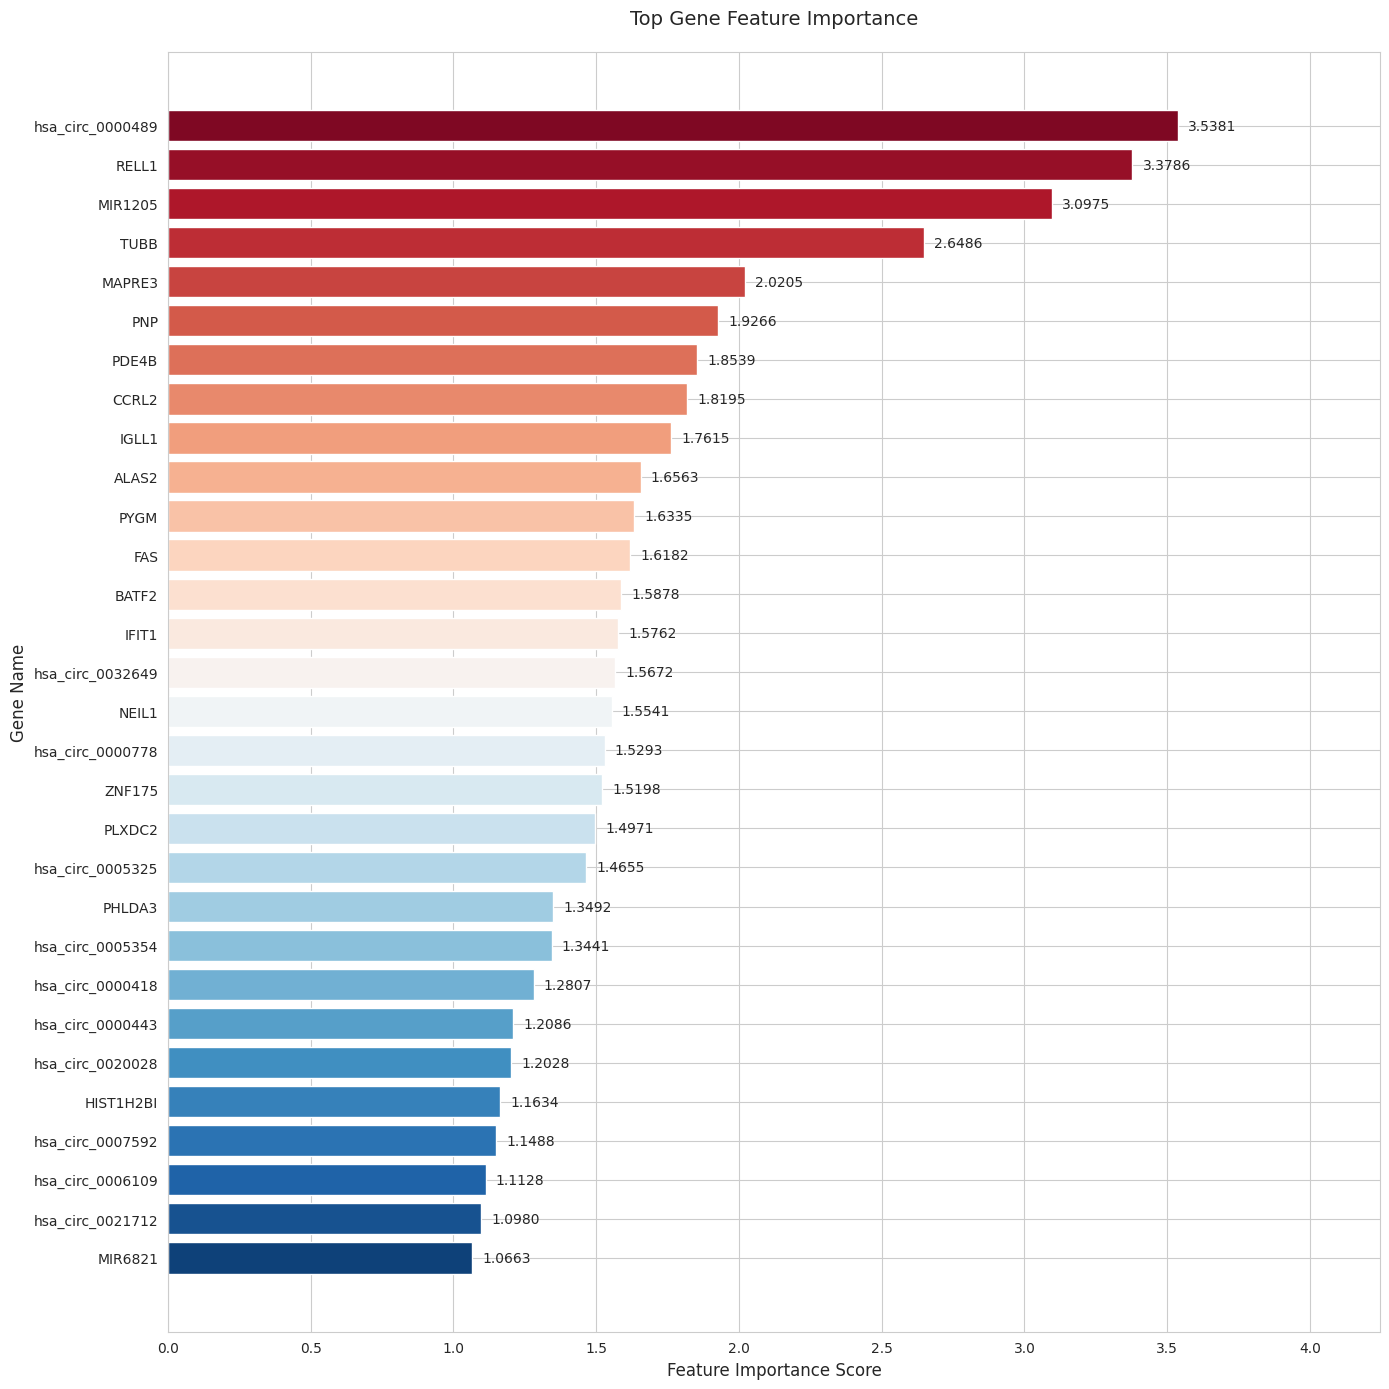

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_genes(importance_dict: dict, n_genes=10, title=None):
    """
    Create a horizontal bar plot of the most important genes directly from a dictionary.
    
    Parameters:
    importance_dict (dict): Dictionary with gene names as keys and importance scores as values
    n_genes (int): Number of top genes to display
    title (str, optional): Title for saving the plot
    """
    # Sort genes by absolute importance and get top n_genes
    sorted_genes = sorted(importance_dict.items(), 
                         key=lambda x: abs(x[1]), 
                         reverse=True)[:n_genes]
    
    # Sort by actual importance value for plotting
    sorted_genes = sorted(sorted_genes, key=lambda x: x[1])
    
    # Separate gene names and importance values
    gene_names = [gene for gene, _ in sorted_genes]
    importance_values = [value for _, value in sorted_genes]
    
    # Calculate figure height based on number of genes (0.4 inches per gene + padding)
    fig_height = max(8, n_genes * 0.4 + 2)
    
    # Set up the plot style with adjusted figure size
    plt.figure(figsize=(14, fig_height))
    sns.set_style("whitegrid")
    
    # Create the bar plot
    ax = plt.gca()
    bars = ax.barh(range(len(gene_names)), 
                   importance_values,
                   color=sns.color_palette("RdBu_r", n_colors=len(gene_names)))
    
    # Set y-axis labels (gene names)
    ax.set_yticks(range(len(gene_names)))
    ax.set_yticklabels(gene_names)
    
    # Customize the plot
    plt.title('Top Gene Feature Importance', pad=20, size=14)
    plt.xlabel('Feature Importance Score', size=12)
    plt.ylabel('Gene Name', size=12)
    
    # Add value labels on the bars with adjusted spacing
    max_val = max(abs(min(importance_values)), abs(max(importance_values)))
    offset = max_val * 0.01  # Dynamic offset based on data range
    
    for i, value in enumerate(importance_values):
        ax.text(value + (offset if value >= 0 else -offset),
                i,
                f'{value:.4f}',
                va='center',
                ha='left' if value >= 0 else 'right',
                fontsize=10)
    
    # Adjust layout and margins
    plt.margins(x=0.2)  # Add 20% padding on x-axis
    plt.tight_layout()
    
    # save plot
    if title:
        plt.savefig(title)
    
    return plt.gcf()

_ = plot_top_genes(fi_nn, n_genes=30, title="Top Genes")

In [34]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:30]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:30]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:30]}

In [37]:
from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions, get_mirna_gene_interactions, gg_interactions, pp_interactions
)
import torch

mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
mrna_A = torch.logical_or(gg_A, pp_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(20), tensor(13.), tensor(12.))

7306


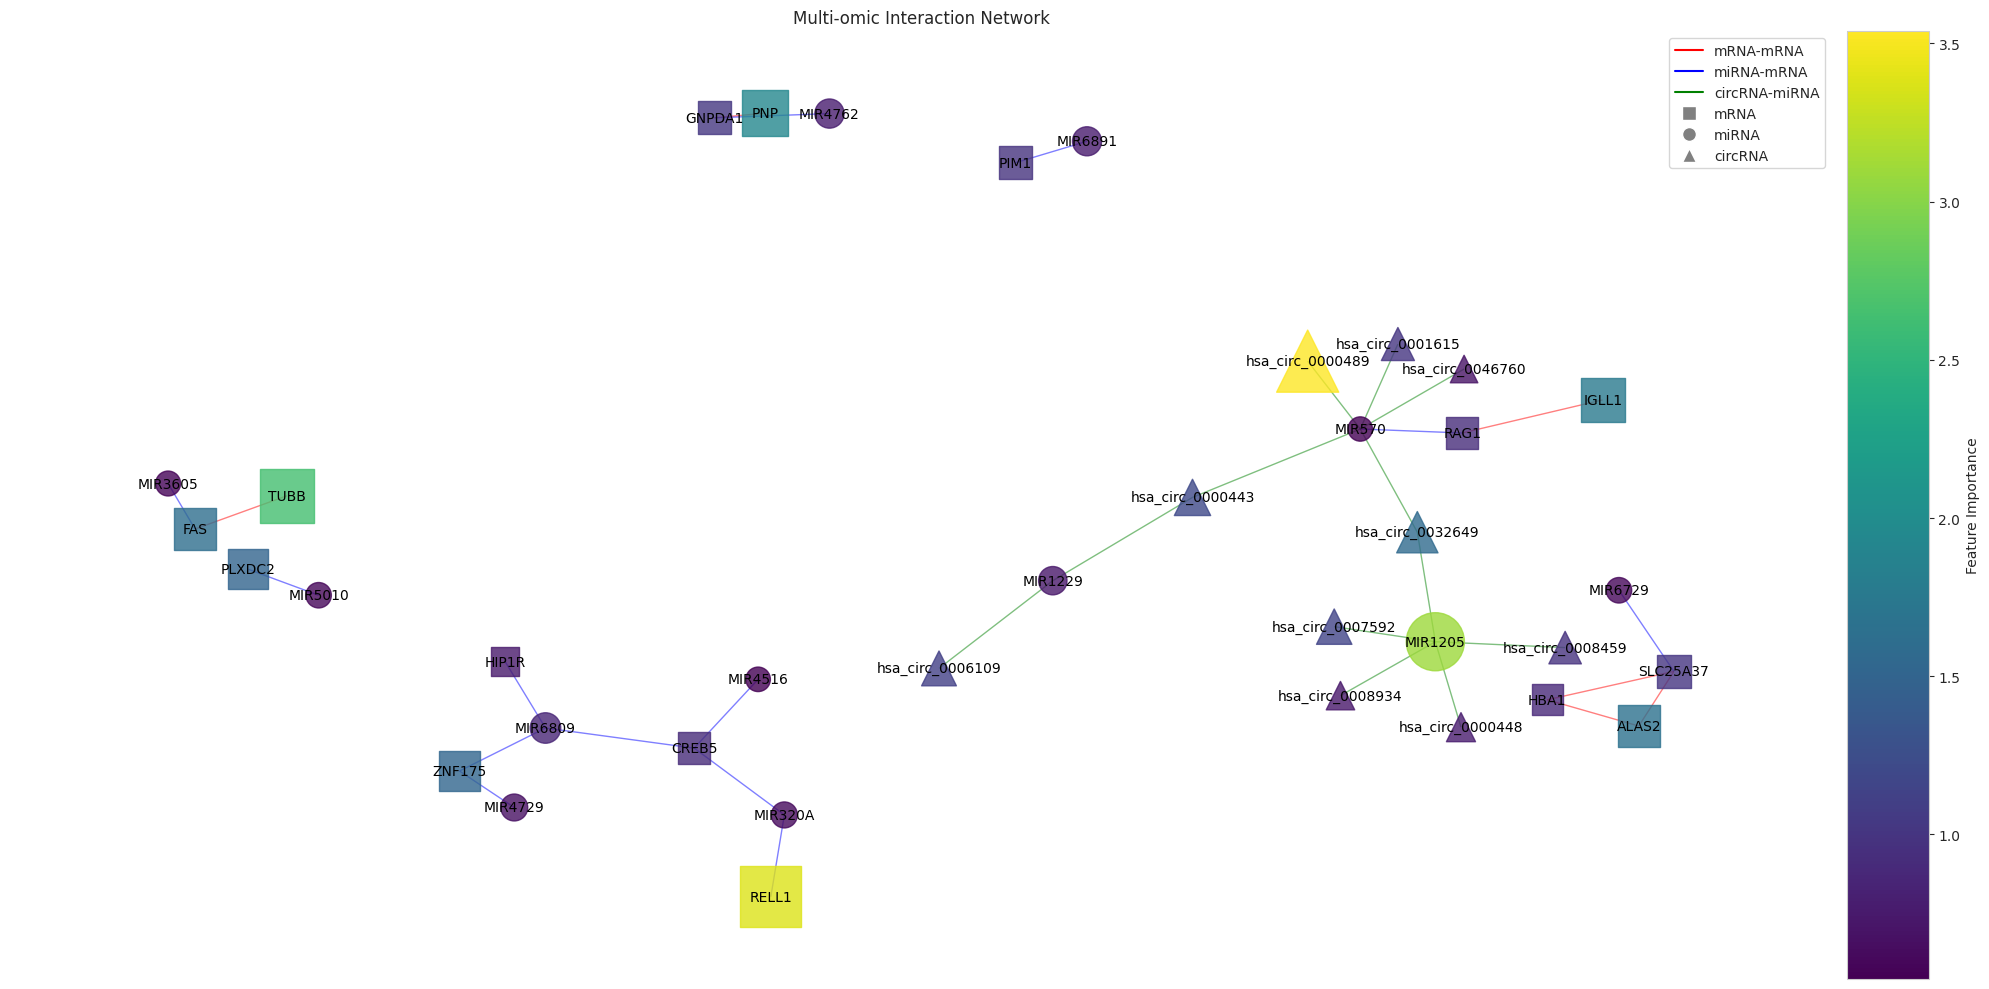

In [106]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize

def create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                            mrna_A, mirna_gene_A, circrna_mirna_A):
    # Create graph
    G = nx.Graph()
    
    # Add nodes with attributes
    # mRNA nodes (rectangle)
    for gene, importance in mrna_dict.items():
        G.add_node(gene, 
                  omic_type='mRNA', 
                  importance=importance,
                  shape='s')  # square
    
    # miRNA nodes (circle)
    for mirna, importance in mirna_dict.items():
        G.add_node(mirna, 
                  omic_type='miRNA', 
                  importance=importance,
                  shape='o')  # circle
    
    # circRNA nodes (triangle)
    for circrna, importance in circrna_dict.items():
        G.add_node(circrna, 
                  omic_type='circRNA', 
                  importance=importance,
                  shape='^')  # triangle
    
    # Add edges with different types
    # mRNA-mRNA interactions
    mrna_genes = list(mrna_dict.keys())
    for i in range(len(mrna_genes)):
        for j in range(i+1, len(mrna_genes)):
            if mrna_A[i,j] == 1:
                G.add_edge(mrna_genes[i], mrna_genes[j], 
                          edge_type='mRNA-mRNA')
    
    # miRNA-mRNA interactions
    mirna_genes = list(mirna_dict.keys())
    for i in range(len(mirna_genes)):
        for j in range(len(mrna_genes)):
            if mirna_gene_A[i,j] == 1:
                G.add_edge(mirna_genes[i], mrna_genes[j], 
                          edge_type='miRNA-mRNA')
    
    # circRNA-miRNA interactions
    circrna_names = list(circrna_dict.keys())
    for i in range(len(circrna_names)):
        for j in range(len(mirna_genes)):
            if circrna_mirna_A[i,j] == 1:
                G.add_edge(circrna_names[i], mirna_genes[j], 
                          edge_type='circRNA-miRNA')
    
    # Remove isolated nodes
    G.remove_nodes_from(list(nx.isolates(G)))
    
    return G

def plot_multi_omic_network(G, figsize=(20,10), seed=42):
    # Create figure with a specific layout for the colorbar
    fig = plt.figure(figsize=figsize)
    gs = plt.GridSpec(1, 20, figure=fig)
    ax_main = fig.add_subplot(gs[:, :19])  # Main plot takes up most of the space
    ax_cbar = fig.add_subplot(gs[:, 19])   # Colorbar on the right
    
    # Set up layout
    pos = nx.fruchterman_reingold_layout(G, scale=1, k=5, iterations=1000, seed=seed)
    
    # Define edge colors
    edge_colors = {
        'mRNA-mRNA': 'red',
        'miRNA-mRNA': 'blue',
        'circRNA-miRNA': 'green'
    }
    
    # Draw edges by type
    for edge_type in edge_colors:
        edge_list = [(u, v) for (u, v, d) in G.edges(data=True) 
                     if d['edge_type'] == edge_type]
        nx.draw_networkx_edges(G, pos, edgelist=edge_list, 
                             edge_color=edge_colors[edge_type], 
                             alpha=0.5,
                             ax=ax_main)
    
    # Get importance values for color mapping
    node_importances = nx.get_node_attributes(G, 'importance')
    max_importance = max(node_importances.values())
    min_importance = min(node_importances.values())
    
    # Create colormap normalization
    norm = Normalize(vmin=min_importance, vmax=max_importance)
    
    # Draw nodes by omic type
    for omic_type in ['mRNA', 'miRNA', 'circRNA']:
        nodes = [node for node, attr in G.nodes(data=True) 
                if attr['omic_type'] == omic_type]
        if not nodes:  # Skip if no nodes of this type
            continue
            
        # Get node sizes and colors based on importance
        node_sizes = [2000 * node_importances[node]/max_importance for node in nodes]
        node_colors = [plt.cm.viridis(norm(node_importances[node])) 
                      for node in nodes]
        
        # Get node shapes
        node_shapes = [G.nodes[node]['shape'] for node in nodes]
        unique_shape = node_shapes[0]  # All nodes of same type have same shape
        
        # Draw nodes
        nx.draw_networkx_nodes(G, pos, 
                             nodelist=nodes,
                             node_size=node_sizes,
                             node_color=node_colors,
                             node_shape=unique_shape,
                             alpha=0.8,
                             ax=ax_main)
    
    # Add labels with smaller font size for better visibility
    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax_main)
    
    # Add colorbar
    ColorbarBase(ax_cbar, cmap=plt.cm.viridis, norm=norm,
                label='Feature Importance')
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], color=edge_colors['mRNA-mRNA'], label='mRNA-mRNA'),
        plt.Line2D([0], [0], color=edge_colors['miRNA-mRNA'], label='miRNA-mRNA'),
        plt.Line2D([0], [0], color=edge_colors['circRNA-miRNA'], label='circRNA-miRNA'),
        plt.Line2D([0], [0], marker='s', color='w', label='mRNA',
                  markerfacecolor='gray', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='miRNA',
                  markerfacecolor='gray', markersize=10),
        plt.Line2D([0], [0], marker='^', color='w', label='circRNA',
                  markerfacecolor='gray', markersize=10),
    ]
    ax_main.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1))
    
    ax_main.set_title('Multi-omic Interaction Network')
    ax_main.axis('off')
    
    plt.tight_layout()
    return plt

# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# generate a random number
seed = 7306 # np.random.randint(0, 10000)
print(seed)
fig = plot_multi_omic_network(G, seed=seed)
# plt.show()
fig.savefig('plots/disease_multi_omic_network.png', dpi=400)

In [ ]:
# from src.evals.mlp import MLPEvaluator

# mlp_eval = MLPEvaluator(
#     data_manager=odm,
#     n_trials=10,
#     verbose=True,
#     params={
#         "lr_range": [1e-4, 1e-2],
#         "l2_lambda": 5e-4,
#         "dropout_range": [0.1, 0.6],
#         "hidden_channels": 64,
#         "proj_dim": 64,
#         "batch_size": 32,
#         "max_epochs": 50,
#     },
# )
# _ = mlp_eval.evaluate()
# mlp_eval.save_results(results_file=save_folder, row_name="MLP")

In [252]:
# mlp_eval.print_best_results()
# mlp_eval.print_best_parameters()

In [253]:
from src.evals.mogonet import MOGONETEvaluator
from src.data_managers.sample_graph import SampleGraphDataManager

mogonet_eval = MOGONETEvaluator(
    data_manager=SampleGraphDataManager(
        omic_data_loaders=omic_data_loaders,
        n_splits=5,
        params={
            "graph_style": "threshold",
            "self_connections": True,
            "avg_degree": 5,
        },
    ),
    n_trials=1,
    params={
        "encoder_hidden_channels": {
            "mrna": 64,
            "mirna": 64,
            "circrna": 64,
            "te": 64,
        },
        "encoder_type": "gat",
        "dropout": 0.2,
        "integrator_type": "vcdn", # vcdn seems to work better on mds disease
        "integration_in_dim": 16,
        "vcdn_hidden_channels": 16,
        "epochs": 250,
        "log_interval": 251,
    }
)
mogonet_eval.evaluate()
mogonet_eval.print_best_results()
mogonet_eval.save_results(results_file=save_folder, row_name="MOGONET")

[I 2024-11-18 21:47:55,371] A new study created in memory with name: no-name-27f7832d-843c-4b18-a274-fedc36a796b7


Using: vcdn integrator
Using: vcdn integrator
Using: vcdn integrator
Using: vcdn integrator
Using: vcdn integrator


[I 2024-11-18 21:52:40,261] Trial 0 finished with value: 0.7767231525925926 and parameters: {}. Best is trial 0 with value: 0.7767231525925926.


New best score: 0.777
Best model performance:
Accuracy: 0.933 ± 0.060
F1 Macro: 0.893 ± 0.093
F1 Weighted: 0.932 ± 0.060
Best model performance:
Accuracy: 0.933 ± 0.060
F1 Macro: 0.893 ± 0.093
F1 Weighted: 0.932 ± 0.060


# linear
Accuracy: 0.947 ± 0.050
F1 Macro: 0.910 ± 0.080
F1 Weighted: 0.945 ± 0.051
# vcdn
- integration dim = 2
Accuracy: 0.825 ± 0.030
F1 Macro: 0.452 ± 0.009
F1 Weighted: 0.746 ± 0.043
- integration dim = 8
Accuracy: 0.973 ± 0.033
F1 Macro: 0.952 ± 0.059
F1 Weighted: 0.971 ± 0.035
- integration dim = 12
Accuracy: 0.973 ± 0.033
F1 Macro: 0.957 ± 0.053
F1 Weighted: 0.973 ± 0.033
- integration dim = 16
Accuracy: 0.973 ± 0.053
F1 Macro: 0.958 ± 0.083
F1 Weighted: 0.973 ± 0.053
# attention - faster than vcdn
- integration dim = 2
Accuracy: 0.933 ± 0.060
F1 Macro: 0.877 ± 0.114
F1 Weighted: 0.927 ± 0.067
- integration dim = 8
Accuracy: 0.973 ± 0.033
F1 Macro: 0.952 ± 0.059
F1 Weighted: 0.971 ± 0.035
- integration dim = 12
Accuracy: 0.947 ± 0.050
F1 Macro: 0.910 ± 0.080
F1 Weighted: 0.945 ± 0.051
- integration dim = 16
Accuracy: 0.960 ± 0.053
F1 Macro: 0.934 ± 0.085
F1 Weighted: 0.959 ± 0.054

In [254]:
from src.evals.birgat import BiRGATEvaluator
from src.data_managers.bipartite_graph import BipartiteGraphDataManager

three_layers = True

birgat_eval = BiRGATEvaluator(
    data_manager=BipartiteGraphDataManager(
        omic_data_loaders=omic_data_loaders,
        n_splits=5,
        params={
            "diff_exp_thresholds" : {
                "mrna": 1.5,
                "mirna": 1.5,
                "circrna": 1.7,
                "te": 1.7,
            },
        },
    ),
    params={
        "epochs": 350,
        "log_interval": 50,
        "hidden_channels": [200, 64, 64, 16, 16],
        "heads": 4,
        "dropout": 0.2,
        "attention_dropout": 0.0,
        "integrator_type": "vcdn",
        "three_layers": three_layers,
    },
    n_trials=1,
)
birgat_eval.evaluate()
birgat_eval.print_best_results()
birgat_eval.save_results(results_file=save_folder, row_name="BiRGAT 3L" if three_layers else "BiRGAT 2L")

isolated sample nodes, isolated gene nodes, mean degree: 
tensor(1) tensor(0) tensor(25.6892)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(0) tensor(21.1486)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(9) tensor(16.1351)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(4) tensor(0) tensor(15.5676)


[I 2024-11-18 21:52:40,696] A new study created in memory with name: no-name-9103e056-f51b-405b-a835-ada329d5a443


isolated sample nodes, isolated gene nodes, mean degree: 
tensor(1) tensor(0) tensor(25.6892)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(0) tensor(21.1486)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(9) tensor(16.1351)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(4) tensor(0) tensor(15.5676)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(1) tensor(0) tensor(25.6892)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(0) tensor(21.1486)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(0) tensor(9) tensor(16.1351)
isolated sample nodes, isolated gene nodes, mean degree: 
tensor(4) tensor(0) tensor(15.5676)

Epoch: 050:
Train Loss: 0.4944, Train Acc: 0.8305, Train F1 Macro: 0.4537, Train F1 Weighted: 0.7536
Val Acc: 0.8000, Val F1 Macro: 0.4444, Val F1 Weighted: 0.7111, Val Geometric Mean: 0.6323
Test Acc: 0.8000, Test F1 Macro: 0.4444, Test F1 Weight

[I 2024-11-18 21:59:24,235] Trial 0 finished with value: 0.6932284788414499 and parameters: {}. Best is trial 0 with value: 0.6932284788414499.



Epoch: 350:
Train Loss: 0.0431, Train Acc: 0.9833, Train F1 Macro: 0.9731, Train F1 Weighted: 0.9836
Val Acc: 0.7857, Val F1 Macro: 0.4400, Val F1 Weighted: 0.7543, Val Geometric Mean: 0.6389
Test Acc: 0.7857, Test F1 Macro: 0.4400, Test F1 Weighted: 0.7543
##################################################
New best score: 0.693
Best model performance:
Accuracy: 0.931 ± 0.045
F1 Macro: 0.813 ± 0.185
F1 Weighted: 0.916 ± 0.068
Best model performance:
Accuracy: 0.931 ± 0.045
F1 Macro: 0.813 ± 0.185
F1 Weighted: 0.916 ± 0.068


In [255]:
# birgat_eval.save_results(results_file=save_folder, row_name="BiRGAT")
save_folder

'logs/mds_disease/mrna_mirna_circrna_te.csv'

```python
omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}

birgat_eval = BiRGATEvaluator(
    data_manager=BipartiteGraphDataManager(
        omic_data_loaders=omic_data_loaders,
        n_splits=5,
        params={
            "diff_exp_thresholds" : {
                "mrna": 1.5,
                "mirna": 1.5,
                "circrna": 1.7,
                # "te": 1.8,
            },
        },
    ),
    params={
        "epochs": 250,
        "log_interval": 50,
        "hidden_channels": [200, 64, 64, 16, 16],
        "heads": 4,
        "dropout": 0.2,
        "attention_dropout": 0.0,
        "integrator_type": "vcdn",
        "three_layers": False,
    },
    n_trials=1,
)
```

Accuracy: 0.960 ± 0.053
F1 Macro: 0.940 ± 0.082
F1 Weighted: 0.961 ± 0.053

# mrna, mirna, circrna, 2L
Accuracy: 0.960 ± 0.033
F1 Macro: 0.915 ± 0.073
F1 Weighted: 0.956 ± 0.036
# mrna, mirna, circrna, 2L no interactions
Accuracy: 0.960 ± 0.053
F1 Macro: 0.918 ± 0.113
F1 Weighted: 0.953 ± 0.064
---
Accuracy: 0.946 ± 0.027
F1 Macro: 0.904 ± 0.048
F1 Weighted: 0.944 ± 0.028
# mrna, mirna, circrna 3L, interactions, degree ~20 in diff exp graphs, larger degree shows degraded performance
# making the avg degree to high shows large jumps on the validation set during training
Accuracy: 0.945 ± 0.053
F1 Macro: 0.910 ± 0.081
F1 Weighted: 0.946 ± 0.048
# mrna, mirna, circrna 2L, interactions, 64 cap
Accuracy: 0.960 ± 0.053
F1 Macro: 0.940 ± 0.082
F1 Weighted: 0.961 ± 0.053
# mrna, mirna, circrna 3L, interactions, 64 cap
Accuracy: 0.891 ± 0.054
F1 Macro: 0.801 ± 0.088
F1 Weighted: 0.888 ± 0.056
# mrna, mirna, circrna 3L
Accuracy: 0.920 ± 0.050
F1 Macro: 0.829 ± 0.112
F1 Weighted: 0.907 ± 0.062
# mrna, mirna, 2L
Accuracy: 0.960 ± 0.033
F1 Macro: 0.915 ± 0.073
F1 Weighted: 0.956 ± 0.036
# mrna, mirna, 3L
Accuracy: 0.947 ± 0.050
F1 Macro: 0.897 ± 0.089
F1 Weighted: 0.944 ± 0.051